# Data Exploration

1. Generate target variable
2. convert release date into correct format
3. generate days since release variable
4. check for correlation between variables and remove highly correlated variables
5. General visualizations to find anything cool
6. separate track and album names along with target to try and do some NLP analysis
    1. remove word stems (keep only body of the word)
    2. identify and remove filler words
    3. check and see correlation between certain words and target variable

In [1]:
# Importing required libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from datetime import datetime

warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('../data/built/track_features.csv')
raw_data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,time_signature,chorus_hit,sections,target,album,release_type,release_date,release_date_precision,explicit,popularities
0,Walking Blues,Big Joe Williams,spotify:track:1ZjN5X8LmUB67pWPgimW3B,0.509,0.277,6,-14.323,1,0.0495,0.827,...,4,68.46530,7,0,Walking Blues,album,1981-01-01,day,False,0
1,Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162,...,4,57.71583,11,1,Classic Masters,album,2002-01-01,day,False,31
2,Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368,...,4,30.34574,17,0,Drive,album,1988-01-01,day,False,13
3,The Wild Rover,The Pogues,spotify:track:6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585,...,3,50.97022,7,0,Red Roses for Me (Expanded Edition),album,1984,year,False,49
4,In The Driver's Seat,John Schneider,spotify:track:6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375,...,4,33.62053,7,1,The Dukes Of Hazzard,album,1978,year,False,21


In [3]:
raw_data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,popularities
count,24698.000000,24698.000000,24698.000000,24698.000000,24698.000000,24698.000000,24698.000000,24698.000000,24698.000000,24698.000000,24698.000000,2.469800e+04,24698.000000,24698.000000,24698.000000,24698.00000,24698.000000
mean,0.560788,0.642772,5.263220,-9.113158,0.662564,0.080085,0.254221,0.153554,0.197884,0.514222,120.915787,2.512168e+05,3.923719,40.595865,10.942789,0.50000,29.132197
std,0.183826,0.246324,3.572534,5.277124,0.472845,0.085404,0.307256,0.303221,0.171552,0.261718,29.133453,1.105231e+05,0.373012,19.702683,4.669843,0.50001,24.814525
min,0.057600,0.000251,0.000000,-49.253000,0.000000,0.022000,0.000000,0.000000,0.013000,0.000000,34.535000,1.592000e+04,0.000000,0.000000,1.000000,0.00000,0.000000
25%,0.442000,0.485000,2.000000,-11.417750,0.000000,0.034600,0.012900,0.000000,0.091500,0.302000,98.385250,2.008900e+05,4.000000,27.775602,9.000000,0.00000,2.000000
50%,0.579000,0.684000,5.000000,-7.765000,1.000000,0.046700,0.104000,0.000093,0.128000,0.524000,119.773000,2.357935e+05,4.000000,36.057290,10.000000,0.50000,28.000000
75%,0.695000,0.843000,8.000000,-5.465000,1.000000,0.082700,0.417000,0.056075,0.260000,0.731000,138.832500,2.798930e+05,4.000000,48.027440,12.000000,1.00000,50.000000
max,0.988000,1.000000,11.000000,1.137000,1.000000,0.956000,0.996000,1.000000,0.997000,0.996000,217.943000,4.170227e+06,5.000000,433.182000,169.000000,1.00000,91.000000


array([[<Axes: title={'center': 'popularities'}>]], dtype=object)

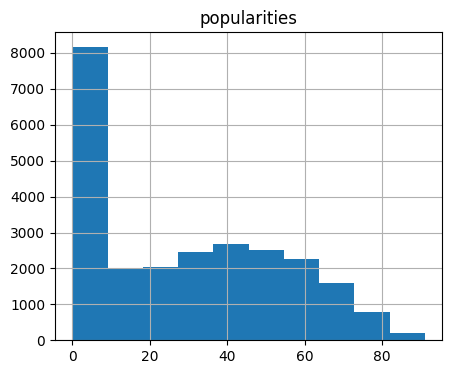

In [4]:
%matplotlib inline
raw_data.hist(column=['popularities'], bins=10, figsize=(5, 4))

In [5]:
condition = raw_data['popularities'] > 50

num_greater_rows = condition.sum()

total_rows = len(raw_data)

(num_greater_rows / total_rows) * 100

24.034334763948497

### Generate target variable

In [6]:
hit_mean = round(raw_data[raw_data.target == 1].popularities.mean())

In [7]:
# raw_data['popularities'] = raw_data.apply(lambda x: flop_mean if (x['target'] == 0 and x['popularities'] == 0) else x['popularities'], axis=1)
raw_data['popularities'] = raw_data.apply(lambda x: hit_mean if (x['target'] == 1 and x['popularities'] == 0) else x['popularities'], axis=1)

In [8]:
raw_data = raw_data[raw_data.popularities != 0]

In [9]:
raw_data['target_popularity'] = raw_data.popularities.apply(lambda x: 1 if x > 45 else 0)

In [10]:
raw_data.target_popularity.value_counts()

target_popularity
0    12776
1     7365
Name: count, dtype: int64

In [11]:
raw_data.groupby('target_popularity').danceability.mean()

target_popularity
0    0.556318
1    0.621658
Name: danceability, dtype: float64

### Correcting release date format

In [12]:
raw_data.drop(raw_data[raw_data.release_date == '0000'].index, inplace=True)

In [13]:
def get_correct_format(date_str, precision):
    if precision == 'year':
        return f'{date_str}-01-01'
    elif precision == 'month':
        return f'{date_str}-01'
    else:
        return date_str
    

In [14]:
raw_data['release_date'] = raw_data.apply(lambda x: get_correct_format(x['release_date'], x['release_date_precision']), axis=1)

In [15]:
raw_data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,chorus_hit,sections,target,album,release_type,release_date,release_date_precision,explicit,popularities,target_popularity
1,Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162,...,57.71583,11,1,Classic Masters,album,2002-01-01,day,False,31,0
2,Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368,...,30.34574,17,0,Drive,album,1988-01-01,day,False,13,0
3,The Wild Rover,The Pogues,spotify:track:6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585,...,50.97022,7,0,Red Roses for Me (Expanded Edition),album,1984-01-01,year,False,49,1
4,In The Driver's Seat,John Schneider,spotify:track:6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375,...,33.62053,7,1,The Dukes Of Hazzard,album,1978-01-01,year,False,21,0
6,Young Wild And Free,Brighton Rock,spotify:track:7EBpncUwlHjLhQTetSLb9O,0.454,0.734,2,-15.559,1,0.0410,0.124,...,36.52688,11,0,"Young, Wild And Free",album,1986-01-01,year,False,11,0


In [16]:
raw_data['release_date'] = raw_data.release_date.apply(lambda x: pd.to_datetime(x))
raw_data.head(20)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,chorus_hit,sections,target,album,release_type,release_date,release_date_precision,explicit,popularities,target_popularity
1,Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.7160,0.7530,2,-5.682,1,0.0286,0.162000,...,57.71583,11,1,Classic Masters,album,2002-01-01,day,False,31,0
2,Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.3600,0.5420,5,-13.885,1,0.0339,0.368000,...,30.34574,17,0,Drive,album,1988-01-01,day,False,13,0
3,The Wild Rover,The Pogues,spotify:track:6JyYNPLalPgGa7XnclF5FO,0.6560,0.5120,7,-11.872,1,0.0290,0.585000,...,50.97022,7,0,Red Roses for Me (Expanded Edition),album,1984-01-01,year,False,49,1
4,In The Driver's Seat,John Schneider,spotify:track:6jJi8OXF5qaFdysB6sjWIT,0.6420,0.8890,2,-5.620,0,0.0494,0.375000,...,33.62053,7,1,The Dukes Of Hazzard,album,1978-01-01,year,False,21,0
6,Young Wild And Free,Brighton Rock,spotify:track:7EBpncUwlHjLhQTetSLb9O,0.4540,0.7340,2,-15.559,1,0.0410,0.124000,...,36.52688,11,0,"Young, Wild And Free",album,1986-01-01,year,False,11,0
7,Holiday,The Other Ones,spotify:track:3f1rbdXIbz36QZ8xU7wt2i,0.4870,0.8530,11,-10.165,0,0.0343,0.027700,...,15.23401,10,1,The Other Ones (2019 remaster),album,1986-10-14,day,False,4,0
8,Answering Machine,Rupert Holmes,spotify:track:5Qo14bQqTK9iGbf2g6JUjL,0.7750,0.4880,0,-15.044,1,0.1230,0.240000,...,28.65643,9,1,Partners In Crime,album,1979-01-01,day,False,35,0
9,Crystal Ball,Yngwie Malmsteen,spotify:track:6C3BPDXuHFRbCWsTk4eNPU,0.4060,0.7770,8,-11.498,1,0.0590,0.087000,...,41.44096,12,0,Odyssey,album,1988-01-01,day,False,33,0
10,Right On Track,The Breakfast Club,spotify:track:3UiuKZWtgXjeAfnfGqIeu0,0.7630,0.8240,1,-10.054,0,0.0330,0.061300,...,26.88880,14,1,Breakfast Club,album,1987-01-01,year,False,44,0
11,Driving Blind,Chris & Cosey,spotify:track:02HBzyigV4WjMhBLwmJI7f,0.8060,0.7490,4,-14.328,0,0.0502,0.001640,...,86.13896,17,0,Songs of Love & Lust,album,1984-12-31,day,False,16,0


In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20141 entries, 1 to 24695
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   track                   20141 non-null  object        
 1   artist                  20141 non-null  object        
 2   uri                     20141 non-null  object        
 3   danceability            20141 non-null  float64       
 4   energy                  20141 non-null  float64       
 5   key                     20141 non-null  int64         
 6   loudness                20141 non-null  float64       
 7   mode                    20141 non-null  int64         
 8   speechiness             20141 non-null  float64       
 9   acousticness            20141 non-null  float64       
 10  instrumentalness        20141 non-null  float64       
 11  liveness                20141 non-null  float64       
 12  valence                 20141 non-null  float64    

### Generate days since release

In [18]:
curr_date = datetime.now()

# raw_data['days_since_release'] = raw_data.release_date.apply(lambda x: curr_date - )
raw_data['days_since_release'] = (curr_date - raw_data['release_date']).dt.days
raw_data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,sections,target,album,release_type,release_date,release_date_precision,explicit,popularities,target_popularity,days_since_release
1,Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162,...,11,1,Classic Masters,album,2002-01-01,day,False,31,0,8134
2,Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368,...,17,0,Drive,album,1988-01-01,day,False,13,0,13248
3,The Wild Rover,The Pogues,spotify:track:6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585,...,7,0,Red Roses for Me (Expanded Edition),album,1984-01-01,year,False,49,1,14709
4,In The Driver's Seat,John Schneider,spotify:track:6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375,...,7,1,The Dukes Of Hazzard,album,1978-01-01,year,False,21,0,16900
6,Young Wild And Free,Brighton Rock,spotify:track:7EBpncUwlHjLhQTetSLb9O,0.454,0.734,2,-15.559,1,0.0410,0.124,...,11,0,"Young, Wild And Free",album,1986-01-01,year,False,11,0,13978


### Checking correlation

In [38]:
print(raw_data[['days_since_release', 'popularities']].corr())

                    days_since_release  popularities
days_since_release            1.000000     -0.199869
popularities                 -0.199869      1.000000


In [20]:
raw_data[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','chorus_hit','sections','popularities','days_since_release']].corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,sections,popularities,days_since_release
danceability,1.000000,0.114686,0.239549,0.181670,-0.225965,-0.347103,-0.110528,0.530195,-0.125459,-0.050932,-0.042398,-0.031004,0.237326,-0.055395
energy,0.114686,1.000000,0.745404,0.134382,-0.694455,-0.214410,0.190950,0.323300,0.197314,-0.072545,-0.007608,-0.113607,0.072008,-0.135624
loudness,0.239549,0.745404,1.000000,0.143512,-0.567968,-0.395798,0.097451,0.216836,0.150252,-0.121941,-0.028744,-0.142080,0.256745,-0.331896
speechiness,0.181670,0.134382,0.143512,1.000000,-0.113645,-0.094180,0.125159,0.028333,0.034388,-0.028065,0.007084,-0.022128,0.064572,-0.193655
acousticness,-0.225965,-0.694455,-0.567968,-0.113645,1.000000,0.249681,-0.082291,-0.213521,-0.150687,0.033080,0.003198,0.074627,-0.142958,0.125151
instrumentalness,-0.347103,-0.214410,-0.395798,-0.094180,0.249681,1.000000,-0.023617,-0.271810,-0.045735,0.096395,0.060507,0.064834,-0.271217,0.008032
liveness,-0.110528,0.190950,0.097451,0.125159,-0.082291,-0.023617,1.000000,-0.012479,0.028887,-0.001048,0.045660,-0.029230,-0.083837,-0.001929
valence,0.530195,0.323300,0.216836,0.028333,-0.213521,-0.271810,-0.012479,1.000000,0.061898,-0.121831,-0.063586,-0.075450,0.031378,0.178281
tempo,-0.125459,0.197314,0.150252,0.034388,-0.150687,-0.045735,0.028887,0.061898,1.000000,-0.042070,-0.072726,0.032804,-0.001271,-0.025189
duration_ms,-0.050932,-0.072545,-0.121941,-0.028065,0.033080,0.096395,-0.001048,-0.121831,-0.042070,1.000000,0.083989,0.844532,-0.074807,0.094244


__We see that danceability and valence are moderately correlated. Similarly, we see that energy has a high correlation with loudness and a high negative correlation with acousticness. Consequently, there is a moderate negative correlation between loudness and acousticness.__

### General visualization

In [39]:
numeric_features = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','chorus_hit','sections','popularities','days_since_release']

for feature in numeric_features:
    print(raw_data.groupby('target_popularity')[feature].mean())

target_popularity
0    0.556318
1    0.621658
Name: danceability, dtype: float64
target_popularity
0    0.636456
1    0.663360
Name: energy, dtype: float64
target_popularity
0   -9.607129
1   -7.352255
Name: loudness, dtype: float64
target_popularity
0    0.074797
1    0.087344
Name: speechiness, dtype: float64
target_popularity
0    0.263509
1    0.198094
Name: acousticness, dtype: float64
target_popularity
0    0.161860
1    0.039095
Name: instrumentalness, dtype: float64
target_popularity
0    0.201592
1    0.180742
Name: liveness, dtype: float64
target_popularity
0    0.531906
1    0.536691
Name: valence, dtype: float64
target_popularity
0    120.640646
1    120.976268
Name: tempo, dtype: float64
target_popularity
0    252435.273873
1    239054.507128
Name: duration_ms, dtype: float64
target_popularity
0    40.468287
1    39.464463
Name: chorus_hit, dtype: float64
target_popularity
0    11.045632
1    10.519077
Name: sections, dtype: float64
target_popularity
0    24.999374
1    60